### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

import seaborn as sns

### 2.Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\G.SAI KRISHNA\Desktop\ML_Projects\ML_GFG\9.Naive Bayes Classification\study_data.csv')
data.head()

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   study_time       258 non-null    float64
 2   knowledge_level  258 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


In [4]:
data.describe()

,repetition_time,study_time
count,258.000000,258.000000
mean,0.432713,0.458539
std,0.248108,0.255211
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.330000,0.500000
75%,0.647500,0.660000
max,0.990000,0.930000


In [5]:
#Counting unique values
data['knowledge_level'].unique()

array(['Low', 'High'], dtype=object)

In [6]:
data['knowledge_level'].value_counts()

High    151
Low     107
Name: knowledge_level, dtype: int64

### 3.Data Splitting

In [7]:
x=data.drop(['knowledge_level'],axis=1)
y=data['knowledge_level']

In [8]:
x.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24


In [9]:
y.head()

0     Low
1    High
2     Low
3    High
4     Low
Name: knowledge_level, dtype: object

In [10]:
y=pd.get_dummies(data,columns=['knowledge_level'])

In [11]:
y.head()

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low
0,0.00,0.00,0,1
1,0.24,0.90,1,0
2,0.25,0.33,0,1
3,0.65,0.30,1,0
4,0.98,0.24,0,1


### 4.Data Scaling

In [12]:
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
x

array([[-1.74744134, -1.80019743],
       [-0.77824063,  1.73315205],
       [-0.73785726, -0.50463595],
       [ 0.87747726, -0.62241427],
       [ 2.21012825, -0.8579709 ],
       [-1.34360771,  0.79092552],
       [-0.57632381,  0.39833113],
       [-0.13210682, -1.76093799],
       [ 1.16016081, -0.81871146],
       [-0.93977408,  1.53685485],
       [-0.53594045,  1.3798171 ],
       [-0.09172345, -0.62241427],
       [ 1.40246099, -0.46537652],
       [-1.1416909 ,  1.73315205],
       [-0.53594045,  0.55536889],
       [-0.33402363,  1.34055766],
       [-1.70705798, -1.60390024],
       [-1.42437444, -0.50463595],
       [-0.65709054, -0.66167371],
       [ 0.23134345,  0.39833113],
       [ 1.40246099, -1.01500866],
       [-1.26284099,  0.79092552],
       [-0.57632381,  0.75166608],
       [-0.05134009, -0.70093315],
       [ 1.32169426, -0.81871146],
       [-1.02054081,  1.53685485],
       [-0.73785726, -1.40760304],
       [ 0.06981   , -0.81871146],
       [ 2.0485948 ,

### 5.Training & Testing Data

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y['knowledge_level_High'],test_size=0.3,random_state=0)

In [14]:
x_train.shape

(180, 2)

In [15]:
x_test.shape

(78, 2)

In [16]:
y_train.shape

(180,)

In [17]:
y_test.shape

(78,)

# <font color="green">6.Naive Bayes Classification</font>

## Training the Model

In [18]:
nvb = GaussianNB()
nvb.fit(x_train,y_train)

GaussianNB()

## Predicting Test Values

In [19]:
y_pred = nvb.predict(x_test)

y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=uint8)

## Visualizing Model Performance

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[36,  0],
       [ 4, 38]], dtype=int64)

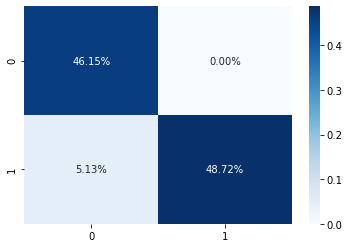

In [21]:
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')

In [22]:
print("Accuracy : "+str(accuracy_score(y_test,y_pred)*100)+"%")

Accuracy : 94.87179487179486%


###

In [23]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
x1

array([[-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202],
       [-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202],
       [-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202],
       ...,
       [-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202],
       [-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202],
       [-2.70705798, -2.69705798, -2.68705798, ...,  3.22294202,
         3.23294202,  3.24294202]])

In [24]:
x2

array([[-2.76093799, -2.76093799, -2.76093799, ..., -2.76093799,
        -2.76093799, -2.76093799],
       [-2.75093799, -2.75093799, -2.75093799, ..., -2.75093799,
        -2.75093799, -2.75093799],
       [-2.74093799, -2.74093799, -2.74093799, ..., -2.74093799,
        -2.74093799, -2.74093799],
       ...,
       [ 2.58906201,  2.58906201,  2.58906201, ...,  2.58906201,
         2.58906201,  2.58906201],
       [ 2.59906201,  2.59906201,  2.59906201, ...,  2.59906201,
         2.59906201,  2.59906201],
       [ 2.60906201,  2.60906201,  2.60906201, ...,  2.60906201,
         2.60906201,  2.60906201]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


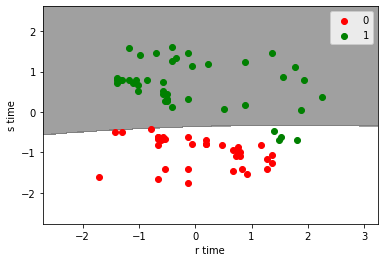

In [25]:
plt.contourf(x1,x2,nvb.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('White','grey')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c=ListedColormap(('red','green'))(i),label=j)

plt.xlabel('r time')
plt.ylabel('s time')
plt.legend()
plt.show()